In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

adult_df = pd.read_csv('adult.csv')
adult_df.head(10)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [38]:
print('\n ### train 데이터 정보 ###  \n')
print(adult_df.info())
## income 을 레이블로 설정 (목적에 맞는 데이터)
## 나머지 14개는 피처값


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   work-class        32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  native-country    32561 non-null  object
 14  is_more_than_50K  32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB
None


In [39]:
def drop_features(df):
    df.drop(['fnlwgt', 'education', 'occupation', 'marital-status', 'relationship', 'native-country'],axis=1,inplace=True)
    return df

In [40]:
def format_features(df):
    features = ['race','sex','work-class']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [41]:
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df

In [42]:
from sklearn.preprocessing import LabelEncoder
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
adult_df = pd.read_csv('./adult.csv')
y_adult_df = adult_df['is_more_than_50K']
X_adult_df= adult_df.drop('is_more_than_50K',axis=1)
X_adult_df = transform_features(X_adult_df)
print(X_adult_df)

       age  work-class  ...  capital-loss  hours-per-week
0       39           7  ...             0              40
1       50           6  ...             0              13
2       38           4  ...             0              40
3       53           4  ...             0              40
4       28           4  ...             0              40
...    ...         ...  ...           ...             ...
32556   27           4  ...             0              38
32557   40           4  ...             0              40
32558   58           4  ...             0              40
32559   22           4  ...             0              20
32560   52           5  ...             0              40

[32561 rows x 8 columns]


##### 전처리 끝

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
##데이터분할
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
##데이터
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
## 이상 항상 불러오는 모듈? 파라미터들
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test=train_test_split(X_adult_df, y_adult_df, \
                                                  test_size=0.2, random_state=11)
## 891개 데이터에서 80%를 학습, 20%는 테스트

In [50]:


X_adult_df.info() 

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   work-class      32561 non-null  int64
 2   education-num   32561 non-null  int64
 3   race            32561 non-null  int64
 4   sex             32561 non-null  int64
 5   capital-gain    32561 non-null  int64
 6   capital-loss    32561 non-null  int64
 7   hours-per-week  32561 non-null  int64
dtypes: int64(8)
memory usage: 2.0 MB


In [45]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    ## 평가지표 그림 그리기

In [46]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = X_adult_df.iloc[:, :-1]
y = X_adult_df.iloc[:, -1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[4700  315]
 [1037  461]]
정확도: 0.7924, 정밀도: 0.5941, 재현율: 0.3077,    F1: 0.4055, AUC:0.7390


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


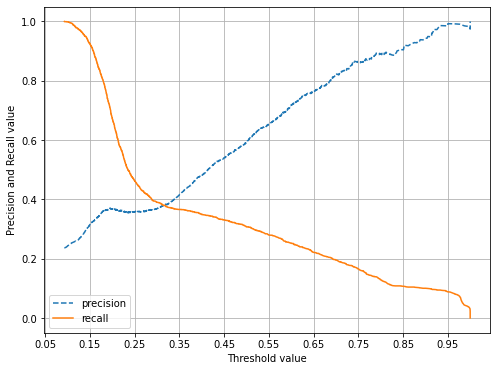

In [47]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [48]:
X_adult_df.describe()

,age,work-class,education-num,race,sex,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,10.080679,3.665858,0.669205,1077.648844,87.303830,40.437456
std,13.640433,1.455960,2.572720,0.848806,0.470506,7385.292085,402.960219,12.347429
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,4.000000,9.000000,4.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,4.000000,10.000000,4.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,4.000000,12.000000,4.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,8.000000,16.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,dt_pred)))
print('DecisionTreeClassifier 재현율: {0: 4f}'.format(recall_score(y_test,dt_pred)))
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,rf_pred)))
print('RandomForestClassifier 재현율: {0: 4f}'.format(recall_score(y_test,rf_pred)))
# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0: 4f}'.format(precision_score(y_test,lr_pred)))
print('LogisticRegression 재현율: {0: 4f}'.format(recall_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도: 0.8095
DecisionTreeClassifier 정밀도:  0.598922
DecisionTreeClassifier 재현율:  0.519359
RandomForestClassifier 정확도:0.8296
RandomForestClassifier 정밀도:  0.662479
RandomForestClassifier 재현율:  0.528037
LogisticRegression 정확도: 0.7924
LogisticRegression 정밀도:  0.594072
LogisticRegression 재현율:  0.307744


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
